# Esercitazione 6
## DFT (terza parte)


### Sommario
In questa esercitazione si studiano in dettaglio le proprietà della Trasformata Discreta di Fourier (DFT) e della Fast Fourier Transform (FFT) applicate a segnali semplici, con l’obiettivo di comprenderne il comportamento sia dal punto di vista analitico che numerico. Attraverso esempi pratici, si analizza come la DFT rappresenti un segnale nel dominio della frequenza, evidenziando il significato dei coefficienti, sia in modulo che in fase, e come questi vengano calcolati efficientemente mediante l’algoritmo FFT.

Nella seconda parte dell’esercitazione, si approfondisce l’effetto del troncamento del segnale e del riempimento con zeri (zero padding) sulla trasformata. In particolare, si studia come modificare il numero di campioni considerati influenzi la risoluzione spettrale e la rappresentazione nel dominio della frequenza. Si analizzano le differenze tra una trasformata calcolata su un numero ridotto di campioni e una trasformata ottenuta estendendo il segnale originario con zeri, discutendo le implicazioni pratiche di queste operazioni nell’analisi spettrale dei segnali.

In [15]:
import numpy as np
import matplotlib.pylab as plt
import scipy.fft as fft  # per la FFT di riferimento
from scipy.io import wavfile
import time

In [2]:
def dft(x):
    X = np.zeros((x.shape[0]), dtype=complex)
    for k in range(x.shape[0]):
        for n in range(x.shape[0]):
            X[k] = X[k] + x[n]*np.exp(-2j*np.pi*k*n/x.shape[0])
    return X

#### Esercizio 1. Ottimizzazione numerica: Fast Fourier Transform - FFT

(a) Considerare il segnale x di lunghezza 128 in cui la prima metà dei campioni vale 1 e la seconda metà vale 0. Calcolare a mano il valore dei coefficienti pari della DFT (utilizzare la serie geometrica). Nota bene: i coefficienti sono indicizzati a partire da 0.

(b) Calcolare la DFT del segnale x utilizzando la funzione creata nelle esercitazioni precedenti e fare un plot del valore assoluto dei coefficienti ottenuti utilizzando la funzione stem della libreria matplotlib.

(c) Calcolare la fase utilizzando il comando angle della libreria numpy (utilizzare come input i coefficienti calcolati al punto 2). Fare un plot del risultato utilizzando la funzione stem. Confrontare il risultato con quello ottenuto utilizzando come input della funzione i coefficienti della DFT calcolati con la funzione fft di scipy. A cosa è dovuta la differenza?

Esercizio 1: FFT e DFT manuale

Segnale x (primi 10 campioni): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Lunghezza del segnale: 128 campioni


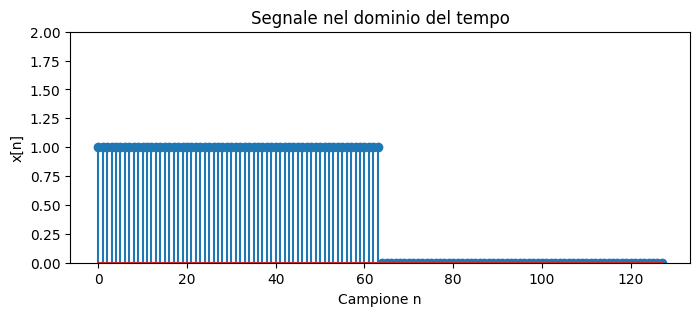

DFT manuale - Magnitudine (primi 5 valori): [6.40000000e+01 4.07477563e+01 4.28428236e-15 1.35935014e+01
 2.88657986e-15]
FFT scipy - Magnitudine (primi 5 valori): [64.         40.74775633  0.         13.59350142  0.        ]


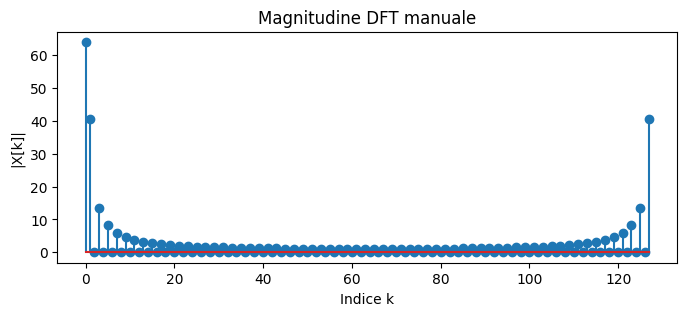

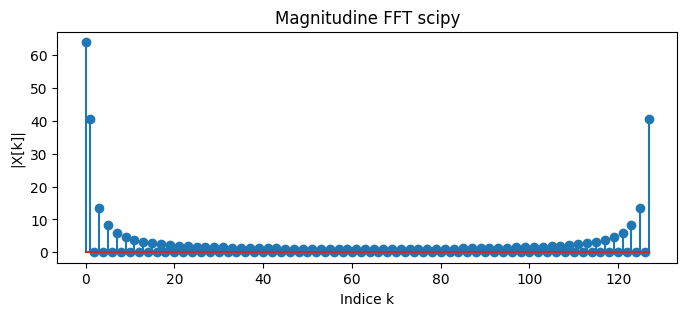

Fase DFT manuale (primi 5 valori): [ 0.         -1.54625263  2.14622098 -1.49716525 -1.96558745]
Fase FFT scipy (primi 5 valori): [-0.         -1.54625263 -0.         -1.49716525  0.        ]


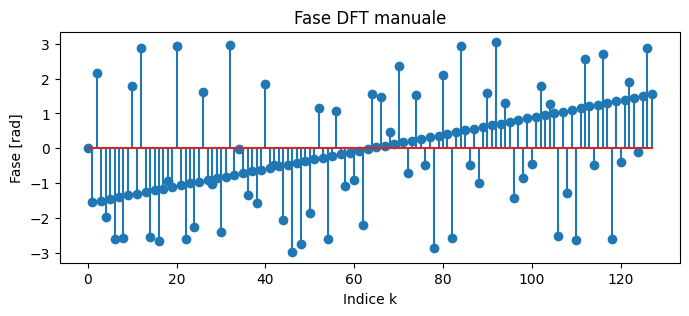

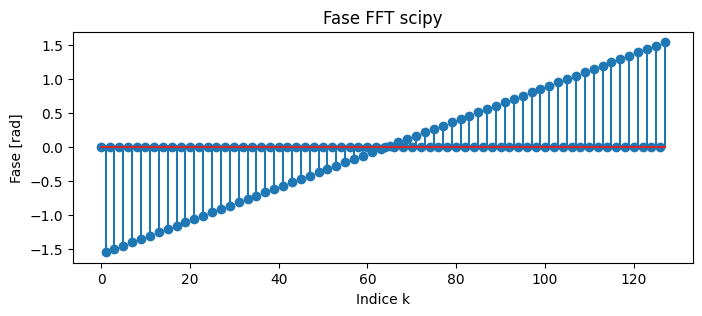


Nota:
Le differenze di fase possono essere dovute a tolleranze numeriche
e a convenzioni di implementazione tra DFT manuale e FFT di libreria.


In [10]:
# ------------------------------------------------------------
# 1) Creazione del segnale x: primi 64 campioni a 1, altri a 0
# ------------------------------------------------------------
print("Esercizio 1: FFT e DFT manuale\n")
y = np.zeros(128)
y[:64] = 1

print(f"Segnale x (primi 10 campioni): {y[:10]}")
print(f"Lunghezza del segnale: {len(y)} campioni")

# Plot del segnale nel dominio del tempo
plt.figure(figsize=(8,3))
plt.stem(np.arange(128), y)
plt.xlabel('Campione n')
plt.ylabel('x[n]')
plt.ylim([0, 2])
plt.title('Segnale nel dominio del tempo')
plt.show()

# ------------------------------------------------------------
# 2) Calcolo DFT manuale e FFT di libreria
# ------------------------------------------------------------
Y_dft = dft(y)
Y_fft = fft.fft(y)

print(f"DFT manuale - Magnitudine (primi 5 valori): {np.abs(Y_dft)[:5]}")
print(f"FFT scipy - Magnitudine (primi 5 valori): {np.abs(Y_fft)[:5]}")

# Magnitudine DFT manuale
plt.figure(figsize=(8,3))
plt.stem(np.arange(128), np.abs(Y_dft))
plt.xlabel('Indice k')
plt.ylabel('|X[k]|')
plt.title('Magnitudine DFT manuale')
plt.show()

# Magnitudine FFT scipy
plt.figure(figsize=(8,3))
plt.stem(np.arange(128), np.abs(Y_fft))
plt.xlabel('Indice k')
plt.ylabel('|X[k]|')
plt.title('Magnitudine FFT scipy')
plt.show()

# ------------------------------------------------------------
# 3) Calcolo e plot della fase
# ------------------------------------------------------------
fase_dft = np.angle(Y_dft)
fase_fft = np.angle(Y_fft)

print(f"Fase DFT manuale (primi 5 valori): {fase_dft[:5]}")
print(f"Fase FFT scipy (primi 5 valori): {fase_fft[:5]}")

plt.figure(figsize=(8,3))
plt.stem(np.arange(128), fase_dft)
plt.xlabel('Indice k')
plt.ylabel('Fase [rad]')
plt.title('Fase DFT manuale')
plt.show()

plt.figure(figsize=(8,3))
plt.stem(np.arange(128), fase_fft)
plt.xlabel('Indice k')
plt.ylabel('Fase [rad]')
plt.title('Fase FFT scipy')
plt.show()

# ------------------------------------------------------------
# Nota sul confronto
# ------------------------------------------------------------
print("\nNota:")
print("Le differenze di fase possono essere dovute a tolleranze numeriche")
print("e a convenzioni di implementazione tra DFT manuale e FFT di libreria.")


#### Esercizio 2. Confronto tra DFT e FFT

(a) Per ogni dimensione $N = 2^{\ell}$ con $\ell \in \{4, \dots, 11\}$, generare un segnale casuale di lunghezza $N$.

(b) Calcolare la trasformata discreta di Fourier del segnale utilizzando la funzione creata nelle esercitazioni precedenti.

(c) Calcolare la FFT del segnale $x[n]$ utilizzando la funzione `fft` della libreria `scipy`.

(d) Misurare, per ogni valore di $N$, il tempo impiegato per il calcolo della DFT manuale e della FFT. Utilizzare la funzione `time.time()` prima e dopo l’esecuzione di ciascuna trasformata.

(e) Rappresentare graficamente il tempo di esecuzione in funzione di $N$ utilizzando una scala log-log. Visualizzare i tempi relativi alla DFT manuale e quelli relativi alla FFT, confrontandone l’andamento.

Esercizio 2: Confronto tempi DFT vs FFT

N =   16 | Tempo DFT manuale = 0.000593 s | Tempo FFT scipy = 0.000396 s
N =   32 | Tempo DFT manuale = 0.004314 s | Tempo FFT scipy = 0.000201 s
N =   64 | Tempo DFT manuale = 0.012439 s | Tempo FFT scipy = 0.000235 s
N =  128 | Tempo DFT manuale = 0.038332 s | Tempo FFT scipy = 0.000157 s
N =  256 | Tempo DFT manuale = 0.118384 s | Tempo FFT scipy = 0.000151 s
N =  512 | Tempo DFT manuale = 0.585281 s | Tempo FFT scipy = 0.000175 s
N = 1024 | Tempo DFT manuale = 2.260207 s | Tempo FFT scipy = 0.000198 s
N = 2048 | Tempo DFT manuale = 8.688482 s | Tempo FFT scipy = 0.000177 s


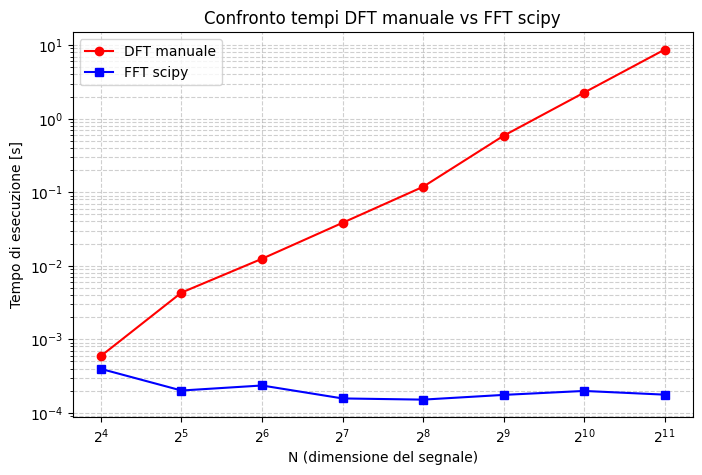


Nota:
La DFT manuale ha complessità O(N^2) → il tempo cresce molto rapidamente con N.
La FFT ha complessità O(N log N) → cresce molto più lentamente.
Il grafico log-log rende visibile la diversa pendenza delle curve.


In [11]:
# ------------------------------------------------------------
# Esercizio 2: Confronto tra DFT manuale e FFT
# ------------------------------------------------------------
print("Esercizio 2: Confronto tempi DFT vs FFT\n")

# Dimensioni N = 2^l con l in {4,...,11}
N_values = [2**i for i in range(4, 12)]  
times_dft = []
times_fft = []

for N in N_values:
    # Segnale casuale di lunghezza N
    signal = np.random.rand(N)

    # Tempo DFT manuale
    start = time.time()
    X_dft = dft(signal)
    end = time.time()
    time_dft = end - start
    times_dft.append(time_dft)

    # Tempo FFT scipy
    start = time.time()
    X_fft = fft.fft(signal)
    end = time.time()
    time_fft = end - start
    times_fft.append(time_fft)

    print(f"N = {N:4d} | Tempo DFT manuale = {time_dft:.6f} s | Tempo FFT scipy = {time_fft:.6f} s")

# ------------------------------------------------------------
# Grafico dei tempi in scala log-log
# ------------------------------------------------------------
plt.figure(figsize=(8, 5))
plt.plot(N_values, times_dft, 'o-', label='DFT manuale', color='red')
plt.plot(N_values, times_fft, 's-', label='FFT scipy', color='blue')
plt.xlabel('N (dimensione del segnale)')
plt.ylabel('Tempo di esecuzione [s]')
plt.xscale('log', base=2)   # scala logaritmica in base 2 per N
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.legend()
plt.title('Confronto tempi DFT manuale vs FFT scipy')
plt.show()

# ------------------------------------------------------------
# Osservazioni
# ------------------------------------------------------------
print("\nNota:")
print("La DFT manuale ha complessità O(N^2) → il tempo cresce molto rapidamente con N.")
print("La FFT ha complessità O(N log N) → cresce molto più lentamente.")
print("Il grafico log-log rende visibile la diversa pendenza delle curve.")


#### Esercizio 3. FFT: Truncating and Zero Padding

(a) Considerare il segnale:

$$
y = \sin\left(\frac{80\pi t}{1000}\right) + \sin\left(\frac{100\pi t}{1000}\right),
$$

dove $t$ è un vettore equispaziato di 4000 punti compresi tra 0 e 3999. Calcolare la DFT di $y$ e fare un plot del suo valore assoluto.

(b) Il comando `fft` della libreria `scipy` accetta anche un secondo parametro opzionale `M` che indica quanti campioni di `y` vengono utilizzati per calcolare la FFT. Se `M` è minore della lunghezza del segnale, la DFT viene calcolata utilizzando solo i primi `M` campioni di `y`. Se `M` è maggiore della lunghezza del segnale, al segnale vengono aggiunti degli zeri al fondo per ottenere la lunghezza desiderata. Calcolare la DFT di `y` utilizzando solo i primi 500 campioni e fare un plot del suo valore assoluto. Ripetere la stessa operazione utilizzando solo i primi 50 campioni di `y`. Qual è la differenza?

(c) Considerare il vettore di coefficienti ottenuto utilizzando solo i primi 50 campioni di `y`. Ricostruire il segnale utilizzando la DFT inversa. Il segnale ottenuto ha lunghezza 50, calcolarne la DFT utilizzando `M = 4000` e fare un plot del suo valore assoluto. Qual è la differenza rispetto a quanto ottenuto al punto precedente?

Esercizio 3: FFT con truncamento e zero padding

Lunghezza segnale originale: 4000 campioni


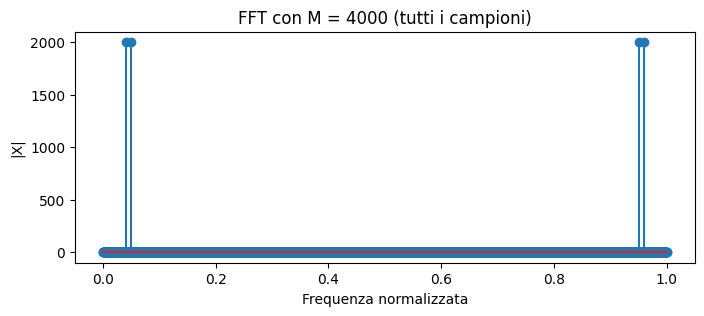

FFT con primi 500 campioni → Troncamento del segnale


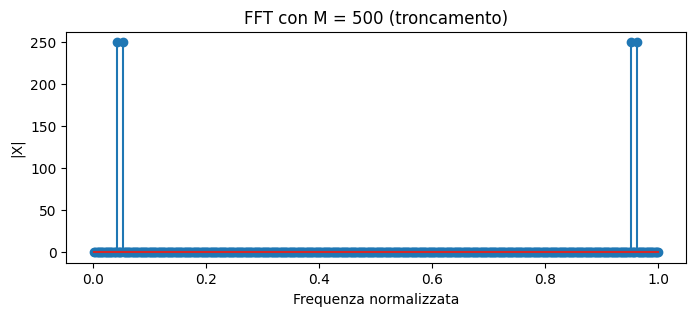

FFT con primi 50 campioni → Troncamento estremo del segnale


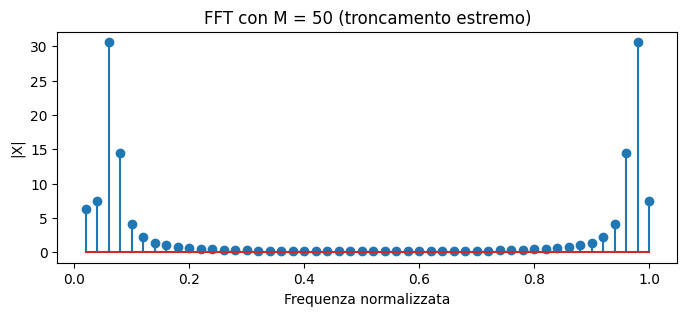

Lunghezza segnale ricostruito (IFFT da M=50): 50 campioni


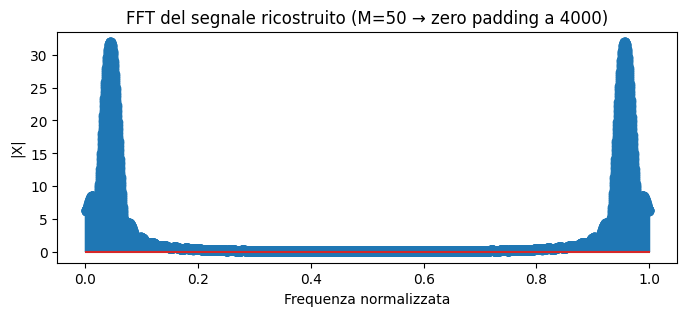


Nota:
- Con M più piccolo del segnale originale → aliasing in frequenza e minore risoluzione.
- Con M molto grande (zero padding) → maggiore densità di campioni in frequenza, ma non si creano nuove informazioni.
- Il troncamento riduce drasticamente la precisione in frequenza, mentre lo zero padding la aumenta solo visivamente.


In [13]:
# ------------------------------------------------------------
# Esercizio 3: FFT con truncamento e zero padding
# ------------------------------------------------------------
print("Esercizio 3: FFT con truncamento e zero padding\n")

# (a) Creazione del segnale
t = np.linspace(0, 3999, 4000)  # 4000 punti equispaziati
y = np.sin(80 * np.pi * t / 1000) + np.sin(100 * np.pi * t / 1000)

print(f"Lunghezza segnale originale: {len(y)} campioni")

# Calcolo FFT con tutti i campioni (M = 4000)
M_full = 4000
Y_full = fft.fft(y, M_full)
freq_norm = np.arange(1, M_full + 1) / M_full

plt.figure(figsize=(8, 3))
plt.stem(freq_norm, np.abs(Y_full))
plt.ylabel('|X|')
plt.xlabel('Frequenza normalizzata')
plt.title('FFT con M = 4000 (tutti i campioni)')
plt.show()

# (b) FFT con soli 500 campioni
M_500 = 500
Y_500 = fft.fft(y, M_500)
freq_norm_500 = np.arange(1, M_500 + 1) / M_500

print(f"FFT con primi {M_500} campioni → Troncamento del segnale")
plt.figure(figsize=(8, 3))
plt.stem(freq_norm_500, np.abs(Y_500))
plt.xlabel('Frequenza normalizzata')
plt.ylabel('|X|')
plt.title(f'FFT con M = {M_500} (troncamento)')
plt.show()

# FFT con soli 50 campioni
M_50 = 50
Y_50 = fft.fft(y, M_50)
freq_norm_50 = np.arange(1, M_50 + 1) / M_50

print(f"FFT con primi {M_50} campioni → Troncamento estremo del segnale")
plt.figure(figsize=(8, 3))
plt.stem(freq_norm_50, np.abs(Y_50))
plt.xlabel('Frequenza normalizzata')
plt.ylabel('|X|')
plt.title(f'FFT con M = {M_50} (troncamento estremo)')
plt.show()

# (c) Ricostruzione dal caso M = 50 con IFFT
y_rec_50 = fft.ifft(Y_50)  # segnale ricostruito da 50 campioni
print(f"Lunghezza segnale ricostruito (IFFT da M=50): {len(y_rec_50)} campioni")

# Calcolo FFT del segnale ricostruito con M = 4000 (zero padding)
Y_rec_4000 = fft.fft(y_rec_50, 4000)
freq_norm_rec = np.arange(1, 4000 + 1) / 4000

plt.figure(figsize=(8, 3))
plt.stem(freq_norm_rec, np.abs(Y_rec_4000))
plt.ylabel('|X|')
plt.xlabel('Frequenza normalizzata')
plt.title('FFT del segnale ricostruito (M=50 → zero padding a 4000)')
plt.show()

# ------------------------------------------------------------
# Nota sulle differenze
# ------------------------------------------------------------
print("\nNota:")
print("- Con M più piccolo del segnale originale → aliasing in frequenza e minore risoluzione.")
print("- Con M molto grande (zero padding) → maggiore densità di campioni in frequenza, ma non si creano nuove informazioni.")
print("- Il troncamento riduce drasticamente la precisione in frequenza, mentre lo zero padding la aumenta solo visivamente.")


#### Esercizio 4.

Considerare il seguente segnale:

$$
x_f = \cos\left(\frac{2\pi f t}{8000}\right).
$$

Il parametro $f$ definisce la frequenza della sinusoide. Impostando adeguatamente il parametro $f$ possiamo rappresentare le varie note musicali. In particolare, consideriamo le seguenti frequenze:

- C4 = 261.63,
- D4 = 293.66,
- F4 = 349.23,
- G4 = 392.00,

che rispondono rispettivamente alle note Do, Re, Fa e Sol. Definiamo i seguenti segnali:

- $x_1 = \cos\left(\frac{2\pi C4 t_1}{8000}\right)$,
- $x_2 = \cos\left(\frac{2\pi C4 t_2}{8000}\right)$,
- $x_3 = \cos\left(\frac{2\pi D4 t_3}{8000}\right)$,
- $x_4 = \cos\left(\frac{2\pi C4 t_3}{8000}\right)$,
- $x_5 = \cos\left(\frac{2\pi G4 t_3}{8000}\right)$,
- $x_6 = \cos\left(\frac{2\pi F4 t_4}{8000}\right)$,

dove $t_1$ è un vettore di 2400 punti equispaziati da 1 a 2400, $t_2$ è un vettore di 1600 punti equispaziati da 1 a 1600, $t_3$ è un vettore di 3200 punti equispaziati da 1 a 3200 e $t_4$ è un vettore di 4000 punti equispaziati da 1 a 4000. Calcolare la DFT dei segnali precedenti e fare un plot del valore assoluto dei primi 500 coefficienti. Salvare i segnali come file audio utilizzando il comando `scipy.io.wavfile.write('sound1.wav',8000,x1)` e provare ad ascoltarli.

Concatenare i segnali in un unico vettore $x = [x_1\; x_2\; x_3\; x_4\; x_5\; x_6]$ (utilizzare la funzione `concatenate` della libreria `numpy`), calcolare la sua DFT e fare un plot del suo valore assoluto. Salvare il segnale `x` come file audio utilizzando il comando `scipy.io.wavfile.write('happy_birthday.wav',8000,x)` e provare ad ascoltarlo.

Esercizio 4: Note musicali e FFT



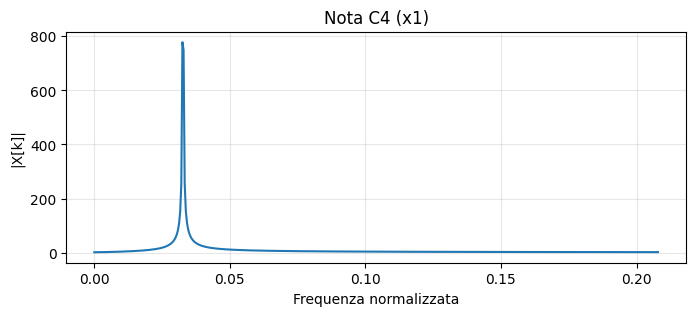

sound1.wav salvato (2400 campioni)


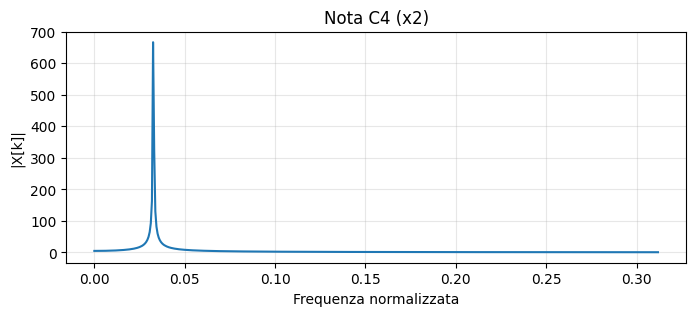

sound2.wav salvato (1600 campioni)


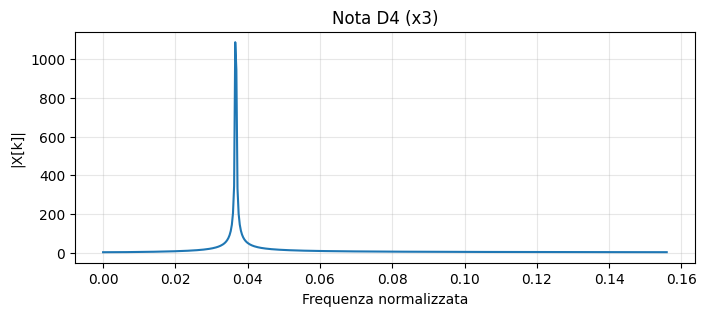

sound3.wav salvato (3200 campioni)


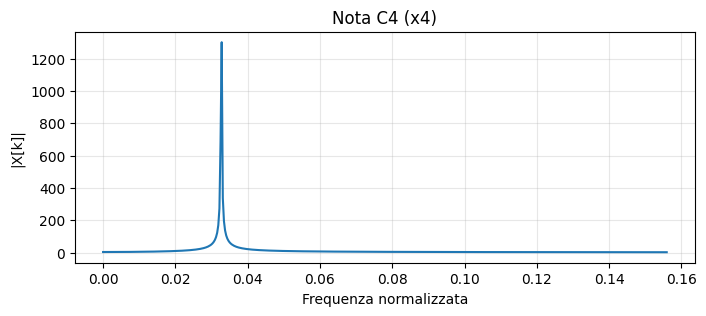

sound4.wav salvato (3200 campioni)


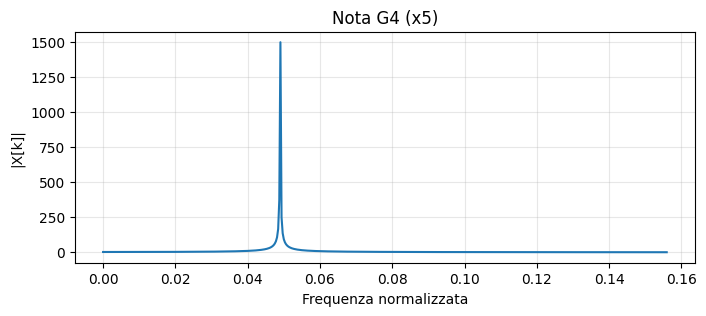

sound5.wav salvato (3200 campioni)


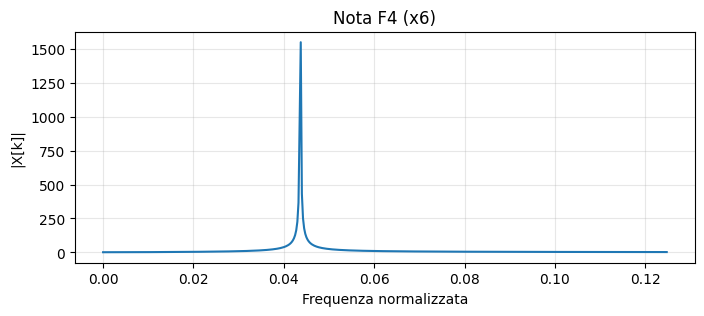

sound6.wav salvato (4000 campioni)

Lunghezza segnale concatenato: 17600 campioni


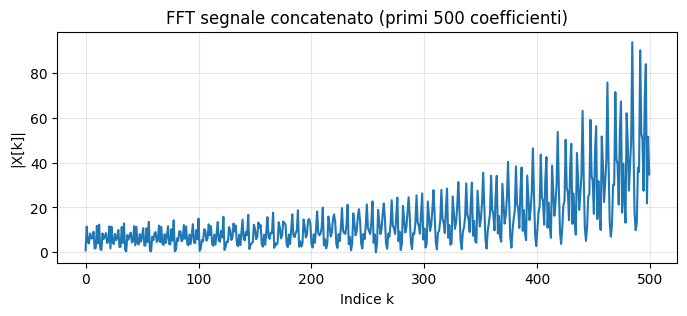

happy_birthday.wav salvato.


In [16]:
# ------------------------------------------------------------
# Esercizio 4: Note musicali e FFT
# ------------------------------------------------------------
print("Esercizio 4: Note musicali e FFT\n")

# Frequenze delle note in Hz
C4 = 261.63  # Do
D4 = 293.66  # Re
F4 = 349.23  # Fa
G4 = 392.00  # Sol

# Frequenza di campionamento
Fs = 8000  # soddisfa il teorema di Nyquist-Shannon

# Durate in campioni
t1 = np.arange(2400)  # 0 → 2399
t2 = np.arange(1600)
t3 = np.arange(3200)
t4 = np.arange(3200)
t5 = np.arange(3200)
t6 = np.arange(4000)

# Generazione segnali
x1 = np.cos(2 * np.pi * C4 / Fs * t1)
x2 = np.cos(2 * np.pi * C4 / Fs * t2)
x3 = np.cos(2 * np.pi * D4 / Fs * t3)
x4 = np.cos(2 * np.pi * C4 / Fs * t4)
x5 = np.cos(2 * np.pi * G4 / Fs * t5)
x6 = np.cos(2 * np.pi * F4 / Fs * t6)

# ------------------------------------------------------------
# Funzione per plot FFT e salvataggio audio
# ------------------------------------------------------------
def plot_fft_and_save(signal, title, filename):
    """
    Plotta i primi 500 coefficienti della FFT del segnale
    e salva il segnale come file audio .wav.
    """
    N = len(signal)
    freq_norm = np.arange(500) / N
    plt.figure(figsize=(8, 3))
    plt.plot(freq_norm, np.abs(fft.fft(signal))[:500])
    plt.xlabel('Frequenza normalizzata')
    plt.ylabel('|X[k]|')
    plt.title(title)
    plt.grid(True, alpha=0.3)
    plt.show()
    wavfile.write(filename, Fs, signal.astype(np.float32))
    print(f"{filename} salvato ({N} campioni)")

# ------------------------------------------------------------
# (DFT + Salvataggio per ogni nota)
# ------------------------------------------------------------
plot_fft_and_save(x1, "Nota C4 (x1)", "sound1.wav")
plot_fft_and_save(x2, "Nota C4 (x2)", "sound2.wav")
plot_fft_and_save(x3, "Nota D4 (x3)", "sound3.wav")
plot_fft_and_save(x4, "Nota C4 (x4)", "sound4.wav")
plot_fft_and_save(x5, "Nota G4 (x5)", "sound5.wav")
plot_fft_and_save(x6, "Nota F4 (x6)", "sound6.wav")

# ------------------------------------------------------------
# (Concatenazione dei segnali e FFT totale)
# ------------------------------------------------------------
x = np.concatenate((x1, x2, x3, x4, x5, x6))
print(f"\nLunghezza segnale concatenato: {len(x)} campioni")

plt.figure(figsize=(8, 3))
plt.plot(np.abs(fft.fft(x))[:500])
plt.xlabel('Indice k')
plt.ylabel('|X[k]|')
plt.title('FFT segnale concatenato (primi 500 coefficienti)')
plt.grid(True, alpha=0.3)
plt.show()

# Salvataggio brano completo
wavfile.write("happy_birthday.wav", Fs, x.astype(np.float32))
print("happy_birthday.wav salvato.")
